In [1]:
import pandas as pd

titanic_data = pd.read_csv('titanic.csv')

print(titanic_data.head())

print(titanic_data.info())

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  

In [2]:
from sklearn.preprocessing import LabelEncoder

# 轉換性別列為數值型態（如果它是字串型態）
if titanic_data['sex'].dtype == 'object':
    titanic_data['sex'] = LabelEncoder().fit_transform(titanic_data['sex'])

# 轉換登船港口（embarked）為數值型態
# 我們先填補缺失值，這裡以出現最多的類別進行填補
if titanic_data['embarked'].dtype == 'object':
    most_frequent = titanic_data['embarked'].mode()[0]
    titanic_data['embarked'].fillna(most_frequent, inplace=True)
    titanic_data['embarked'] = LabelEncoder().fit_transform(titanic_data['embarked'])

# 處理 `pclass` 列，將其轉換為數值型（如果它包含像 '1st' 這樣的字符串）
if titanic_data['pclass'].dtype == 'object':
    # 將類別轉換為數值型
    titanic_data['pclass'] = titanic_data['pclass'].str.extract('(\d)').astype(float)


categorical_features = titanic_data.select_dtypes(include=['object']).columns
titanic_data = pd.get_dummies(titanic_data, columns=categorical_features)

titanic_data.dropna(inplace=True)

# 檢查數據清理與預處理後的結果
print(titanic_data.info())
print(titanic_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 838
Columns: 1880 entries, row.names to boat_D
dtypes: bool(1874), float64(2), int32(2), int64(2)
memory usage: 1.2 MB
None
   row.names  pclass  survived      age  embarked  sex  \
0          1     1.0         1  29.0000         2    0   
1          2     1.0         0   2.0000         2    0   
2          3     1.0         0  30.0000         2    1   
3          4     1.0         0  25.0000         2    0   
4          5     1.0         1   0.9167         2    1   

   name_Abbing, Mr Anthony  name_Abbott, Master Eugene Joseph  \
0                    False                              False   
1                    False                              False   
2                    False                              False   
3                    False                              False   
4                    False                              False   

   name_Abbott, Mr Rossmore Edward  name_Abbott, Mrs Stanton (Rosa)  ... 

C:\Users\jk121\AppData\Local\Temp\ipykernel_23132\2078680702.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['embarked'].fillna(most_frequent, inplace=True)


In [10]:
from sklearn.model_selection import train_test_split

# 分離特徵和標籤
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

# 划分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 檢查分割結果
print("訓練集樣本數：", X_train.shape[0])
print("測試集樣本數：", X_test.shape[0])

訓練集樣本數： 506
測試集樣本數： 127


In [4]:
from sklearn.tree import DecisionTreeClassifier

# 初始化決策樹分類器並訓練
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
from sklearn.metrics import classification_report

# 在測試集上進行預測
y_pred = tree_classifier.predict(X_test)

# 評估模型性能
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        62
           1       0.95      0.88      0.91        65

    accuracy                           0.91       127
   macro avg       0.92      0.91      0.91       127
weighted avg       0.92      0.91      0.91       127



使用【Graphviz】

In [6]:
from sklearn.tree import export_graphviz

# 將決策樹導出為 .dot 文件
dot_file = "2-titanic_tree.dot"
export_graphviz(tree_classifier, out_file=dot_file,
                filled=True, rounded=True,
                special_characters=True)

print(f"決策樹的 DOT 文件已保存為: {dot_file}")

決策樹的 DOT 文件已保存為: 2-titanic_tree.dot


使用【plot_tree】

C:\Users\jk121\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jk121\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


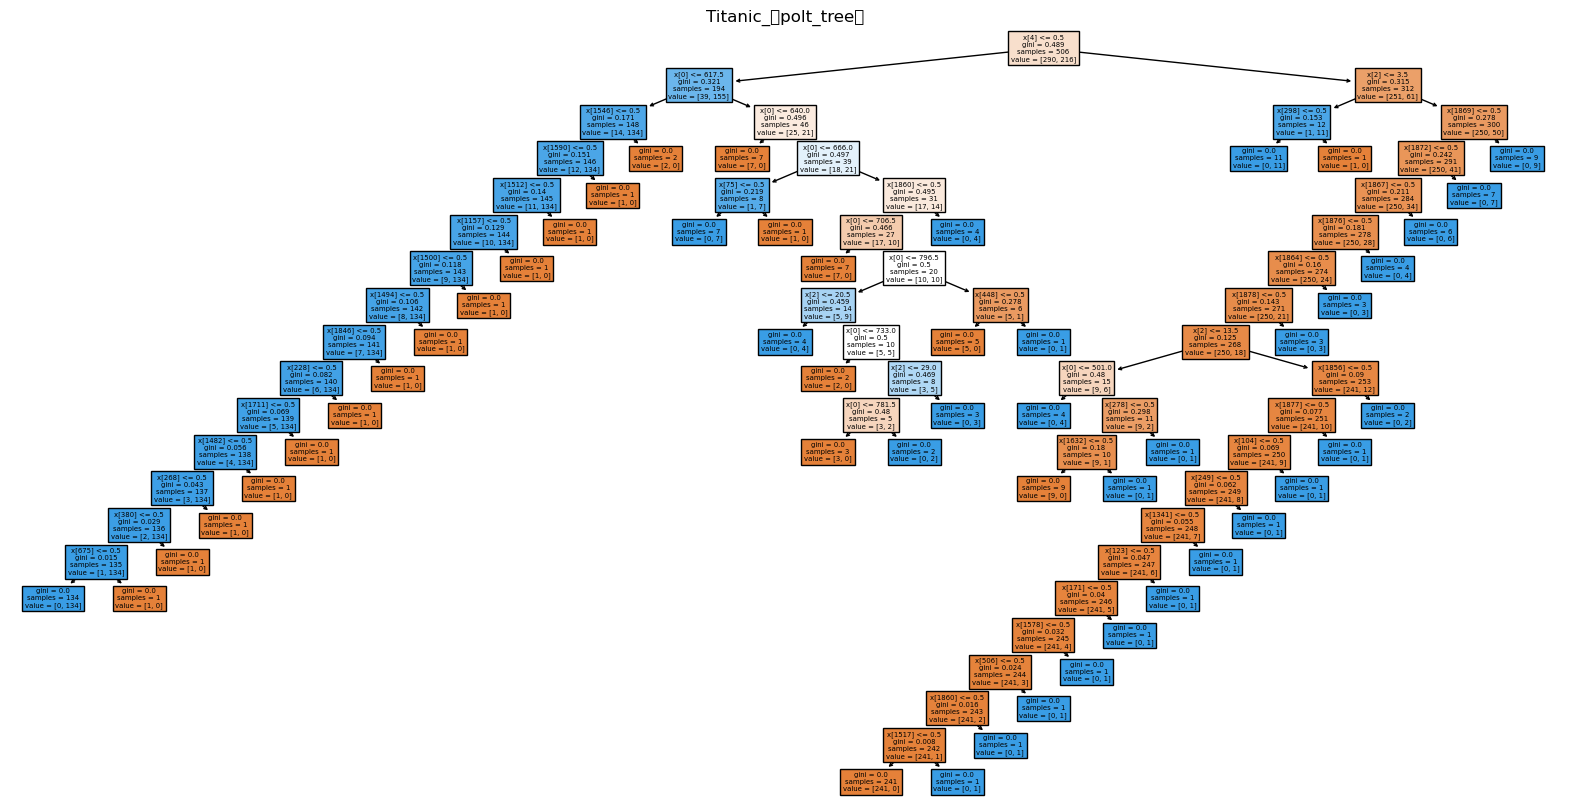

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 使用 plot_tree 進行可視化
plt.figure(figsize=(20,10))
plot_tree(tree_classifier, filled=True)
plt.title("Titanic_【polt_tree】")
plt.show()

使用 【pydotplus】。【dtreeviz】一直報錯

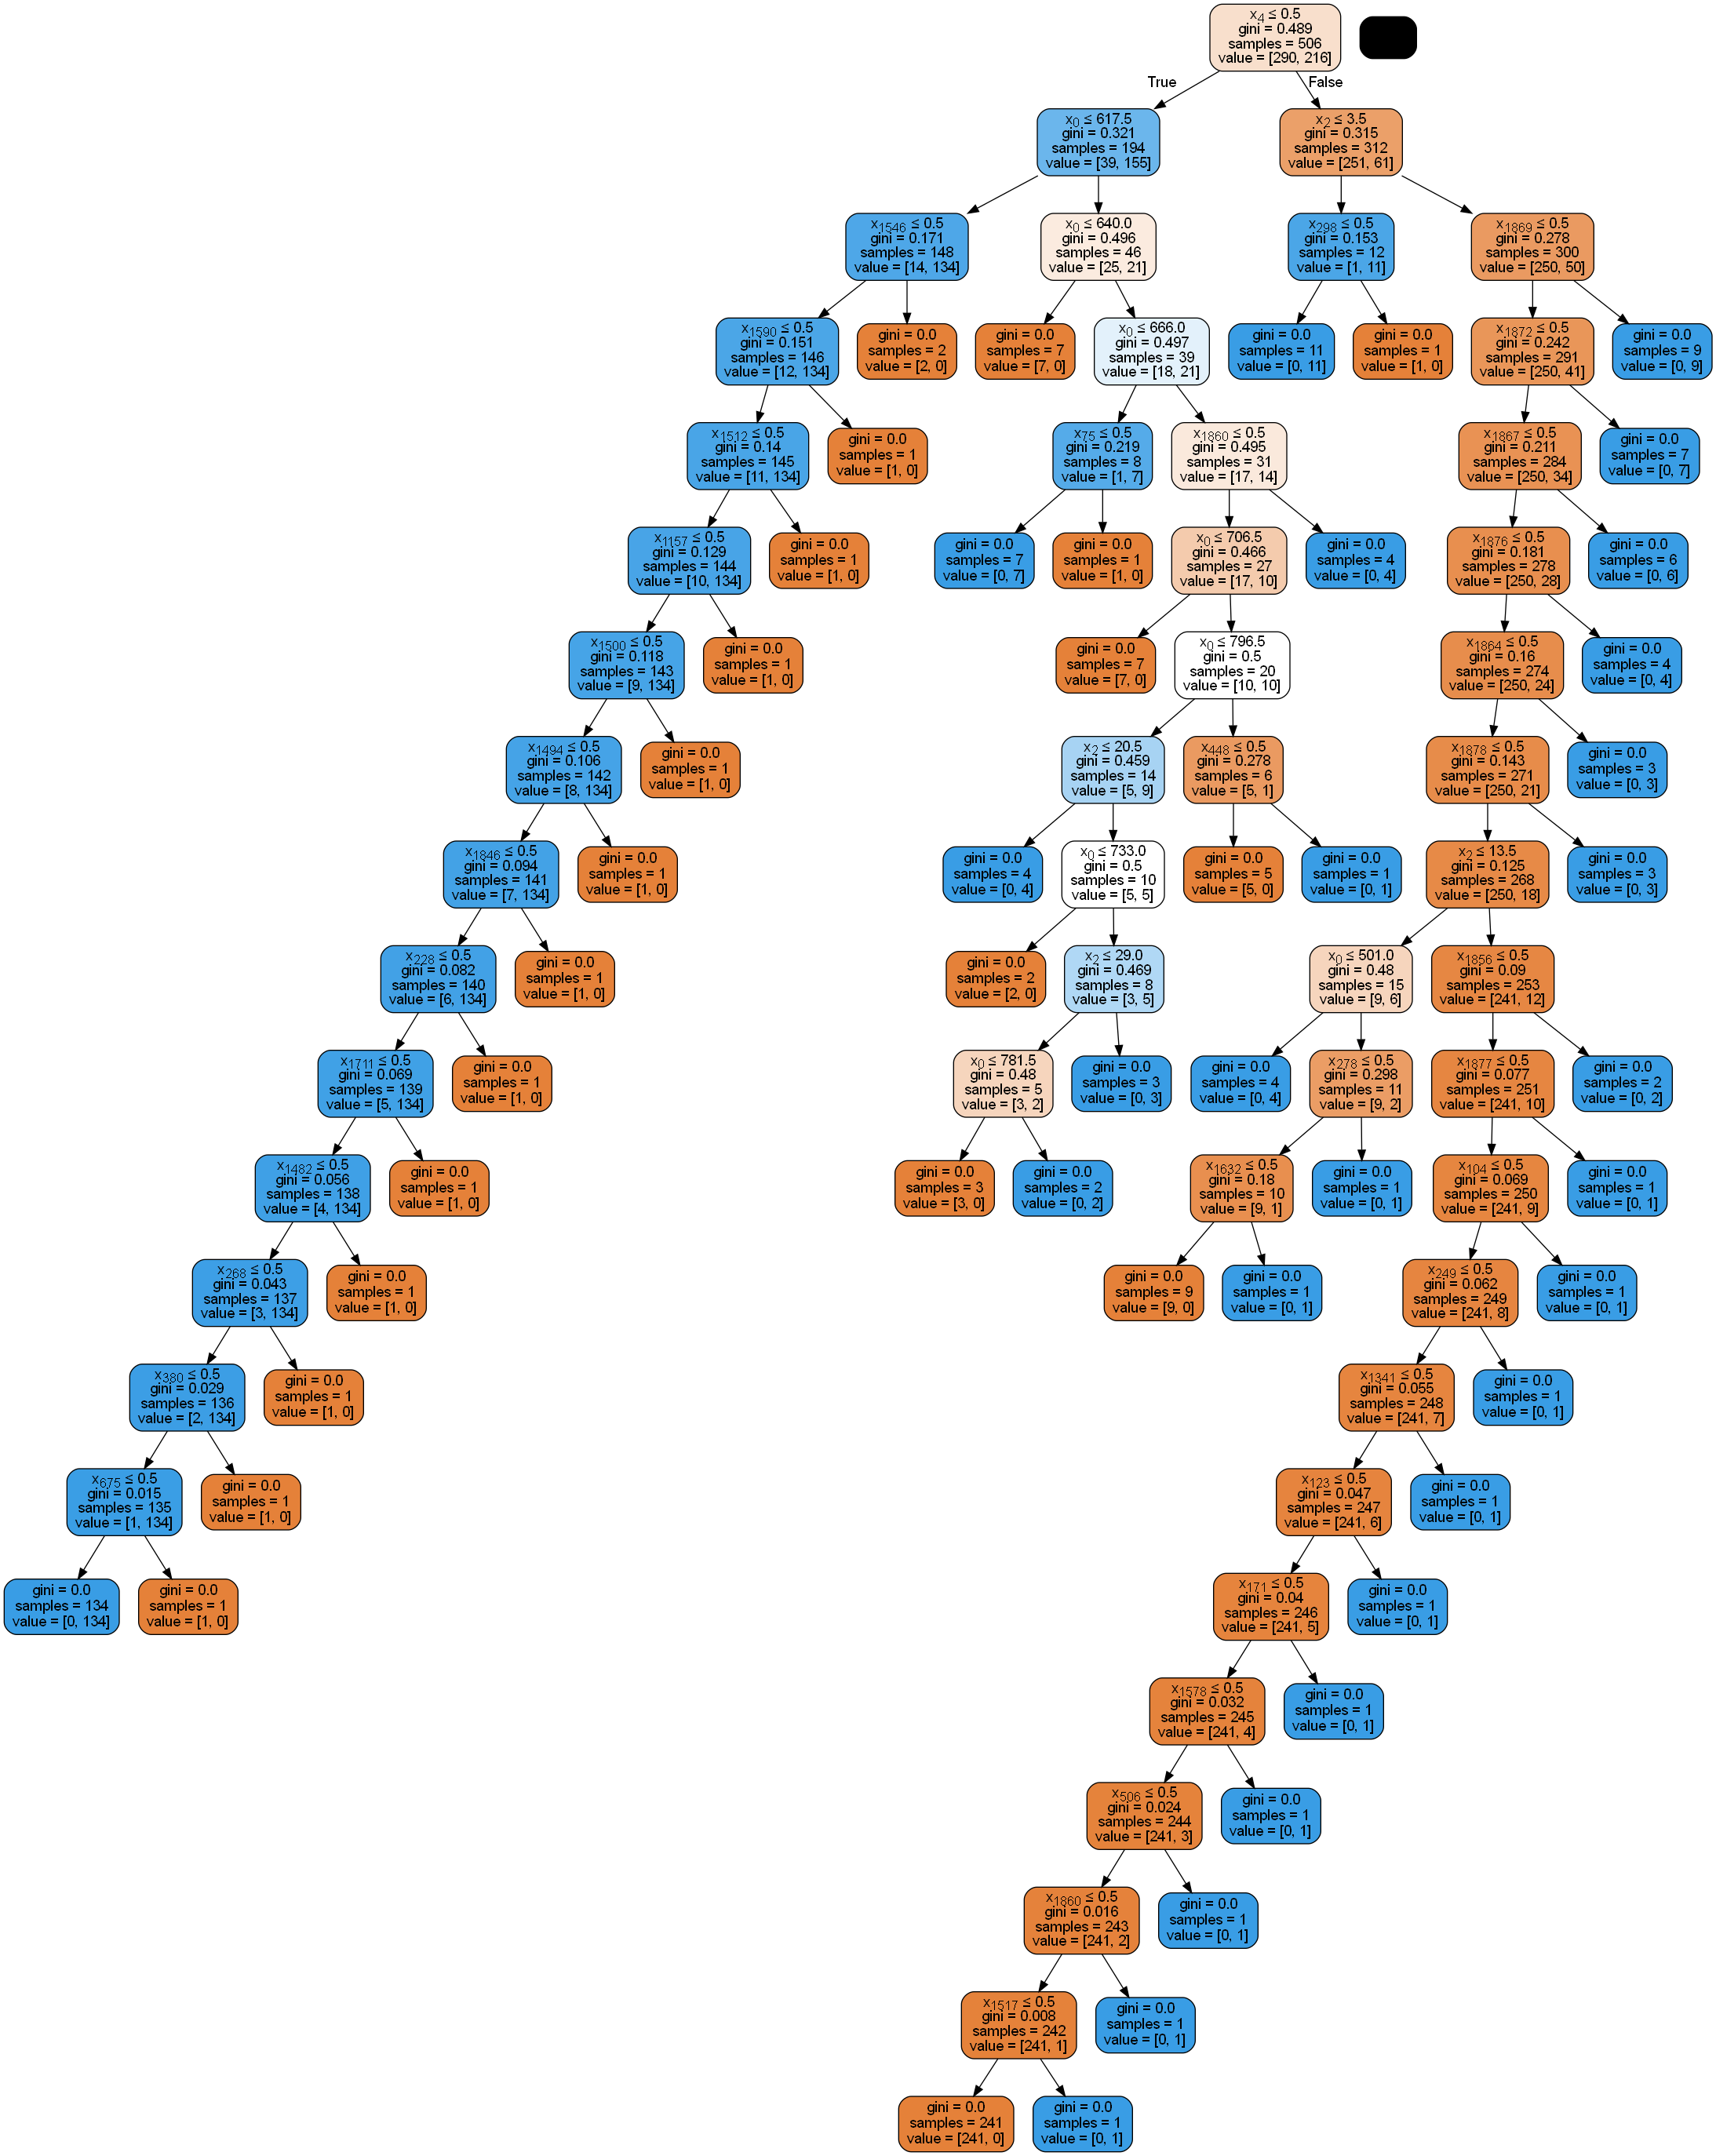

In [8]:
import pydotplus
from IPython.display import Image

# 使用 pydotplus 從 .dot 文件讀取並創建圖像
graph = pydotplus.graph_from_dot_file(dot_file)
Image(graph.create_png())